# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

import core.config as cconfig
import core.plotting.correlation as cplocorr
import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import dataflow.model.model_plotter as dtfmomoplo
import dataflow.model.test.test_model_evaluator as cdmttme
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)
/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


In [5]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-163fa0ca-1c4b-47b8-9778-c91a16442f44.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.5.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask481_Unit_test_plot_cols'
  hash='f136b0dc7'
  # Last commits:
    * f136b0dc7 zli00185 update                                                            (22 minutes ago) Thu Aug 17 13:07:35 2023  (HEAD -> SorrTask481_Unit_test_plot_cols)
    * 5bf345c47 zli00185 update                                                            (24 minutes ago) Thu Aug 17 13:05:59 2023           
    * 0aa69442f zli00185 update       

# Build config

In [6]:
config = cconfig.get_config_from_env()
if config:
    _LOG.info("Using config from env vars")
else:
    _LOG.info("Using hardwired config")
    config_dict = {"figsize": (20, 10)}
    config = cconfig.Config.from_dict(config_dict)
print(config)

INFO  Using hardwired config
figsize: (20, 10)


# Plots

## `plot_histograms_and_lagged_scatterplot()`

In [9]:
test_srs = cptetepl.Test_plots.get_plot_histograms_and_lagged_scatterplot1()
lag = 7

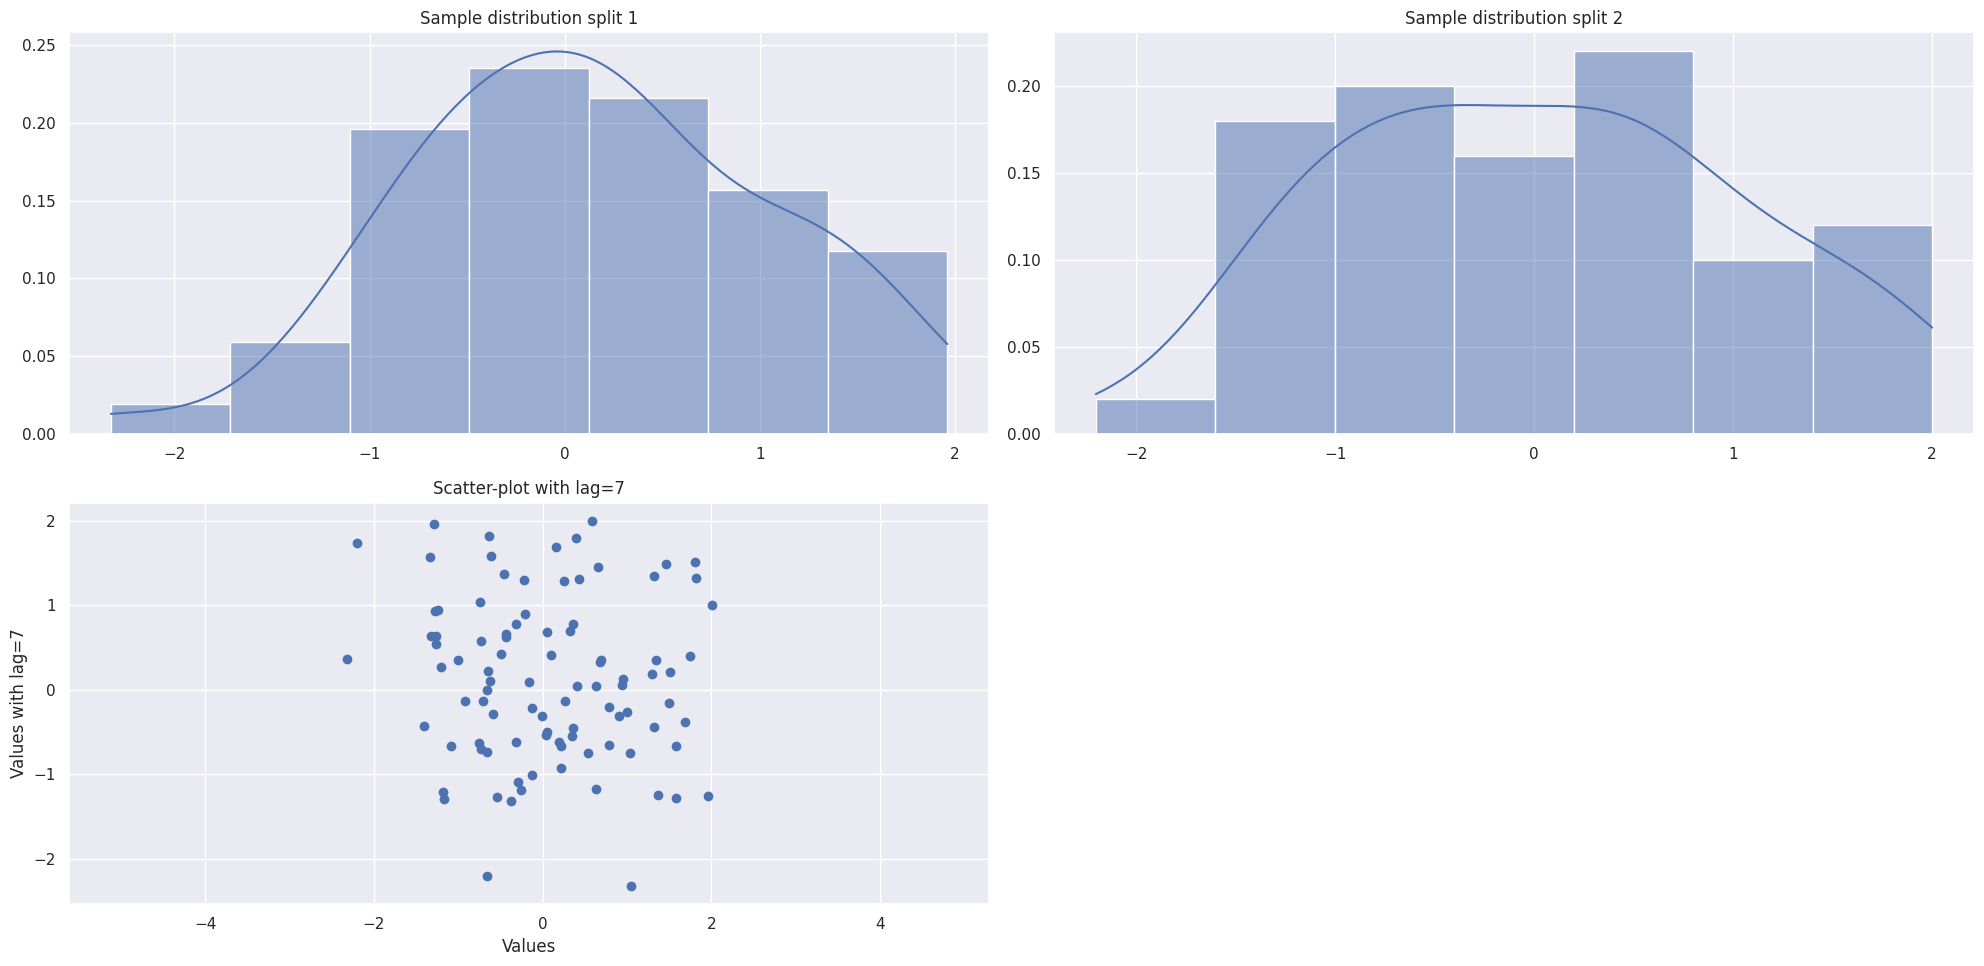

In [10]:
cpvistte.plot_histograms_and_lagged_scatterplot(
    test_srs, lag, figsize=config["figsize"]
)

## `plot_timeseries_distribution()`

In [18]:
test_srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()

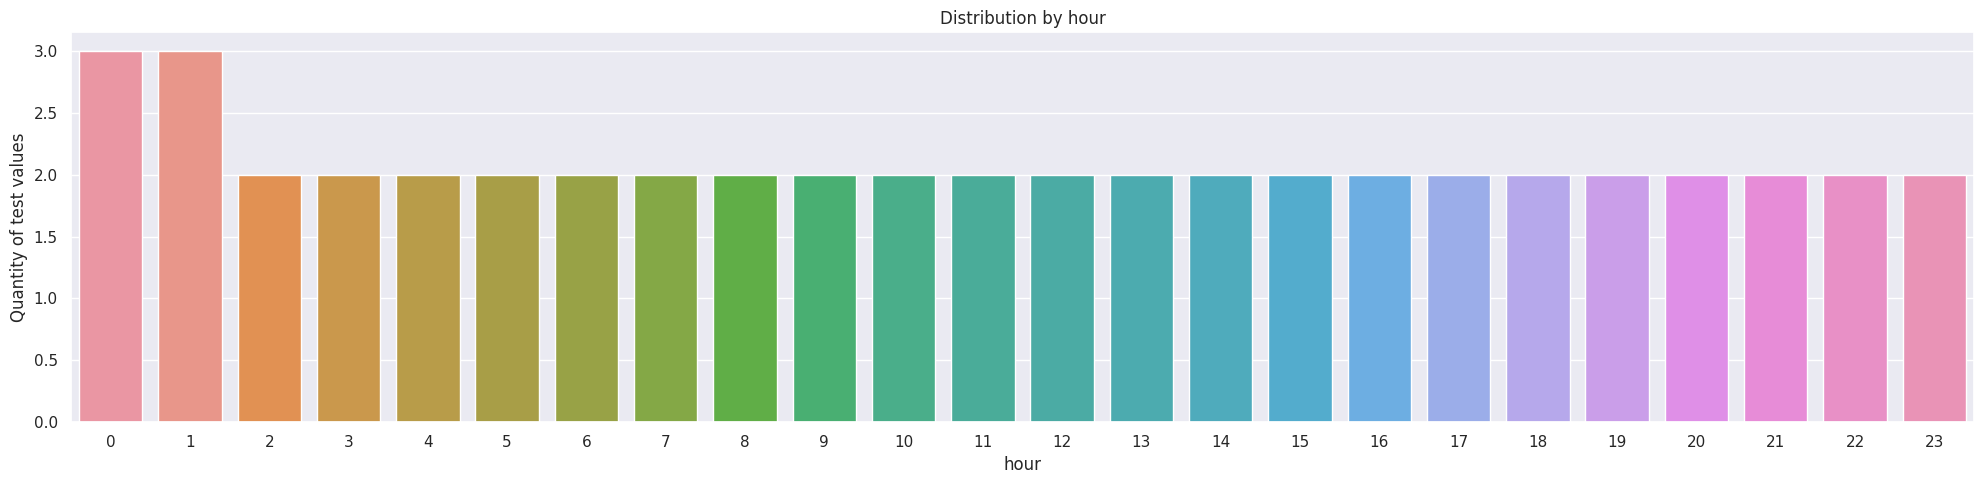

In [8]:
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

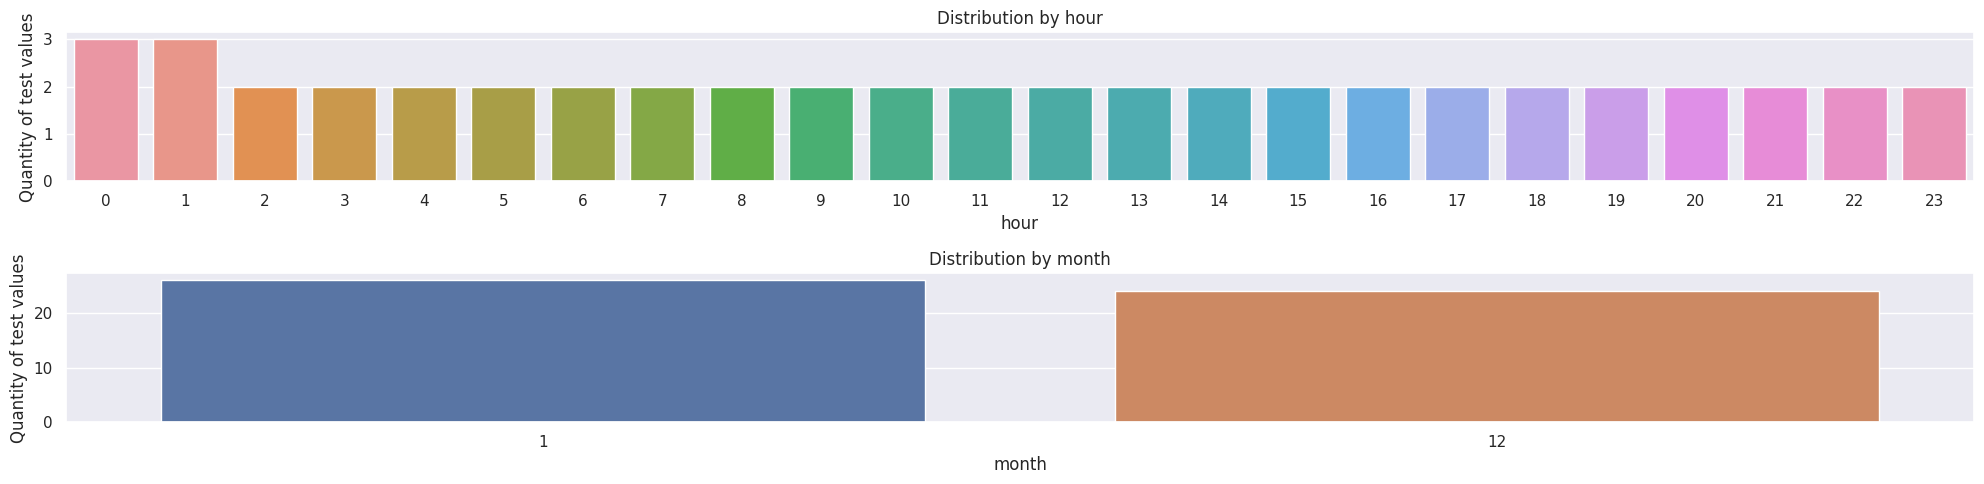

In [9]:
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

## `plot_time_series_by_period()`

In [19]:
test_srs = cptetepl.Test_plots.get_plot_time_series_by_period1()

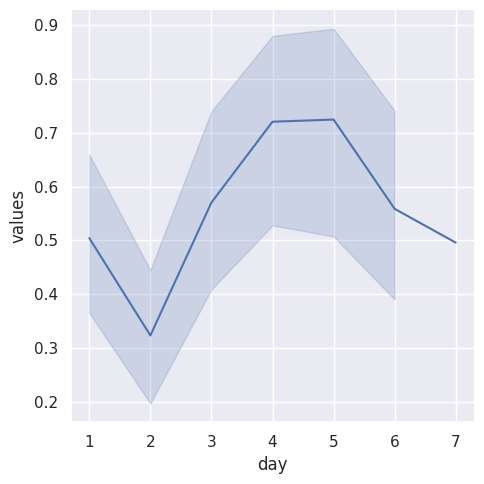

In [11]:
period = "day"
cplmiplo.plot_time_series_by_period(test_srs, period)

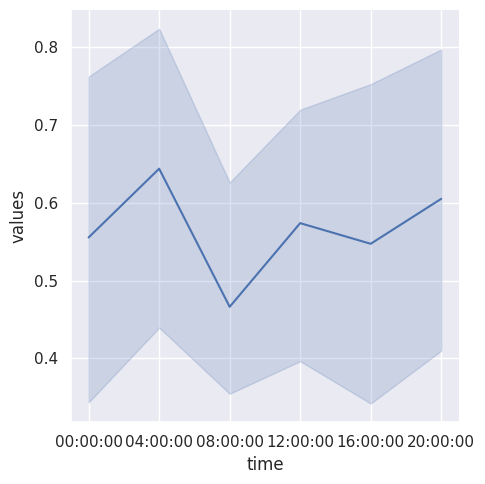

In [12]:
period = "time"
cplmiplo.plot_time_series_by_period(test_srs, period)

## `plot_heatmap()`

In [7]:
mode = "clustermap"
test_df = cptetepl.Test_plots.get_test_plot_df1()

WARNING The corr_df.shape[0]='100' > 20


/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


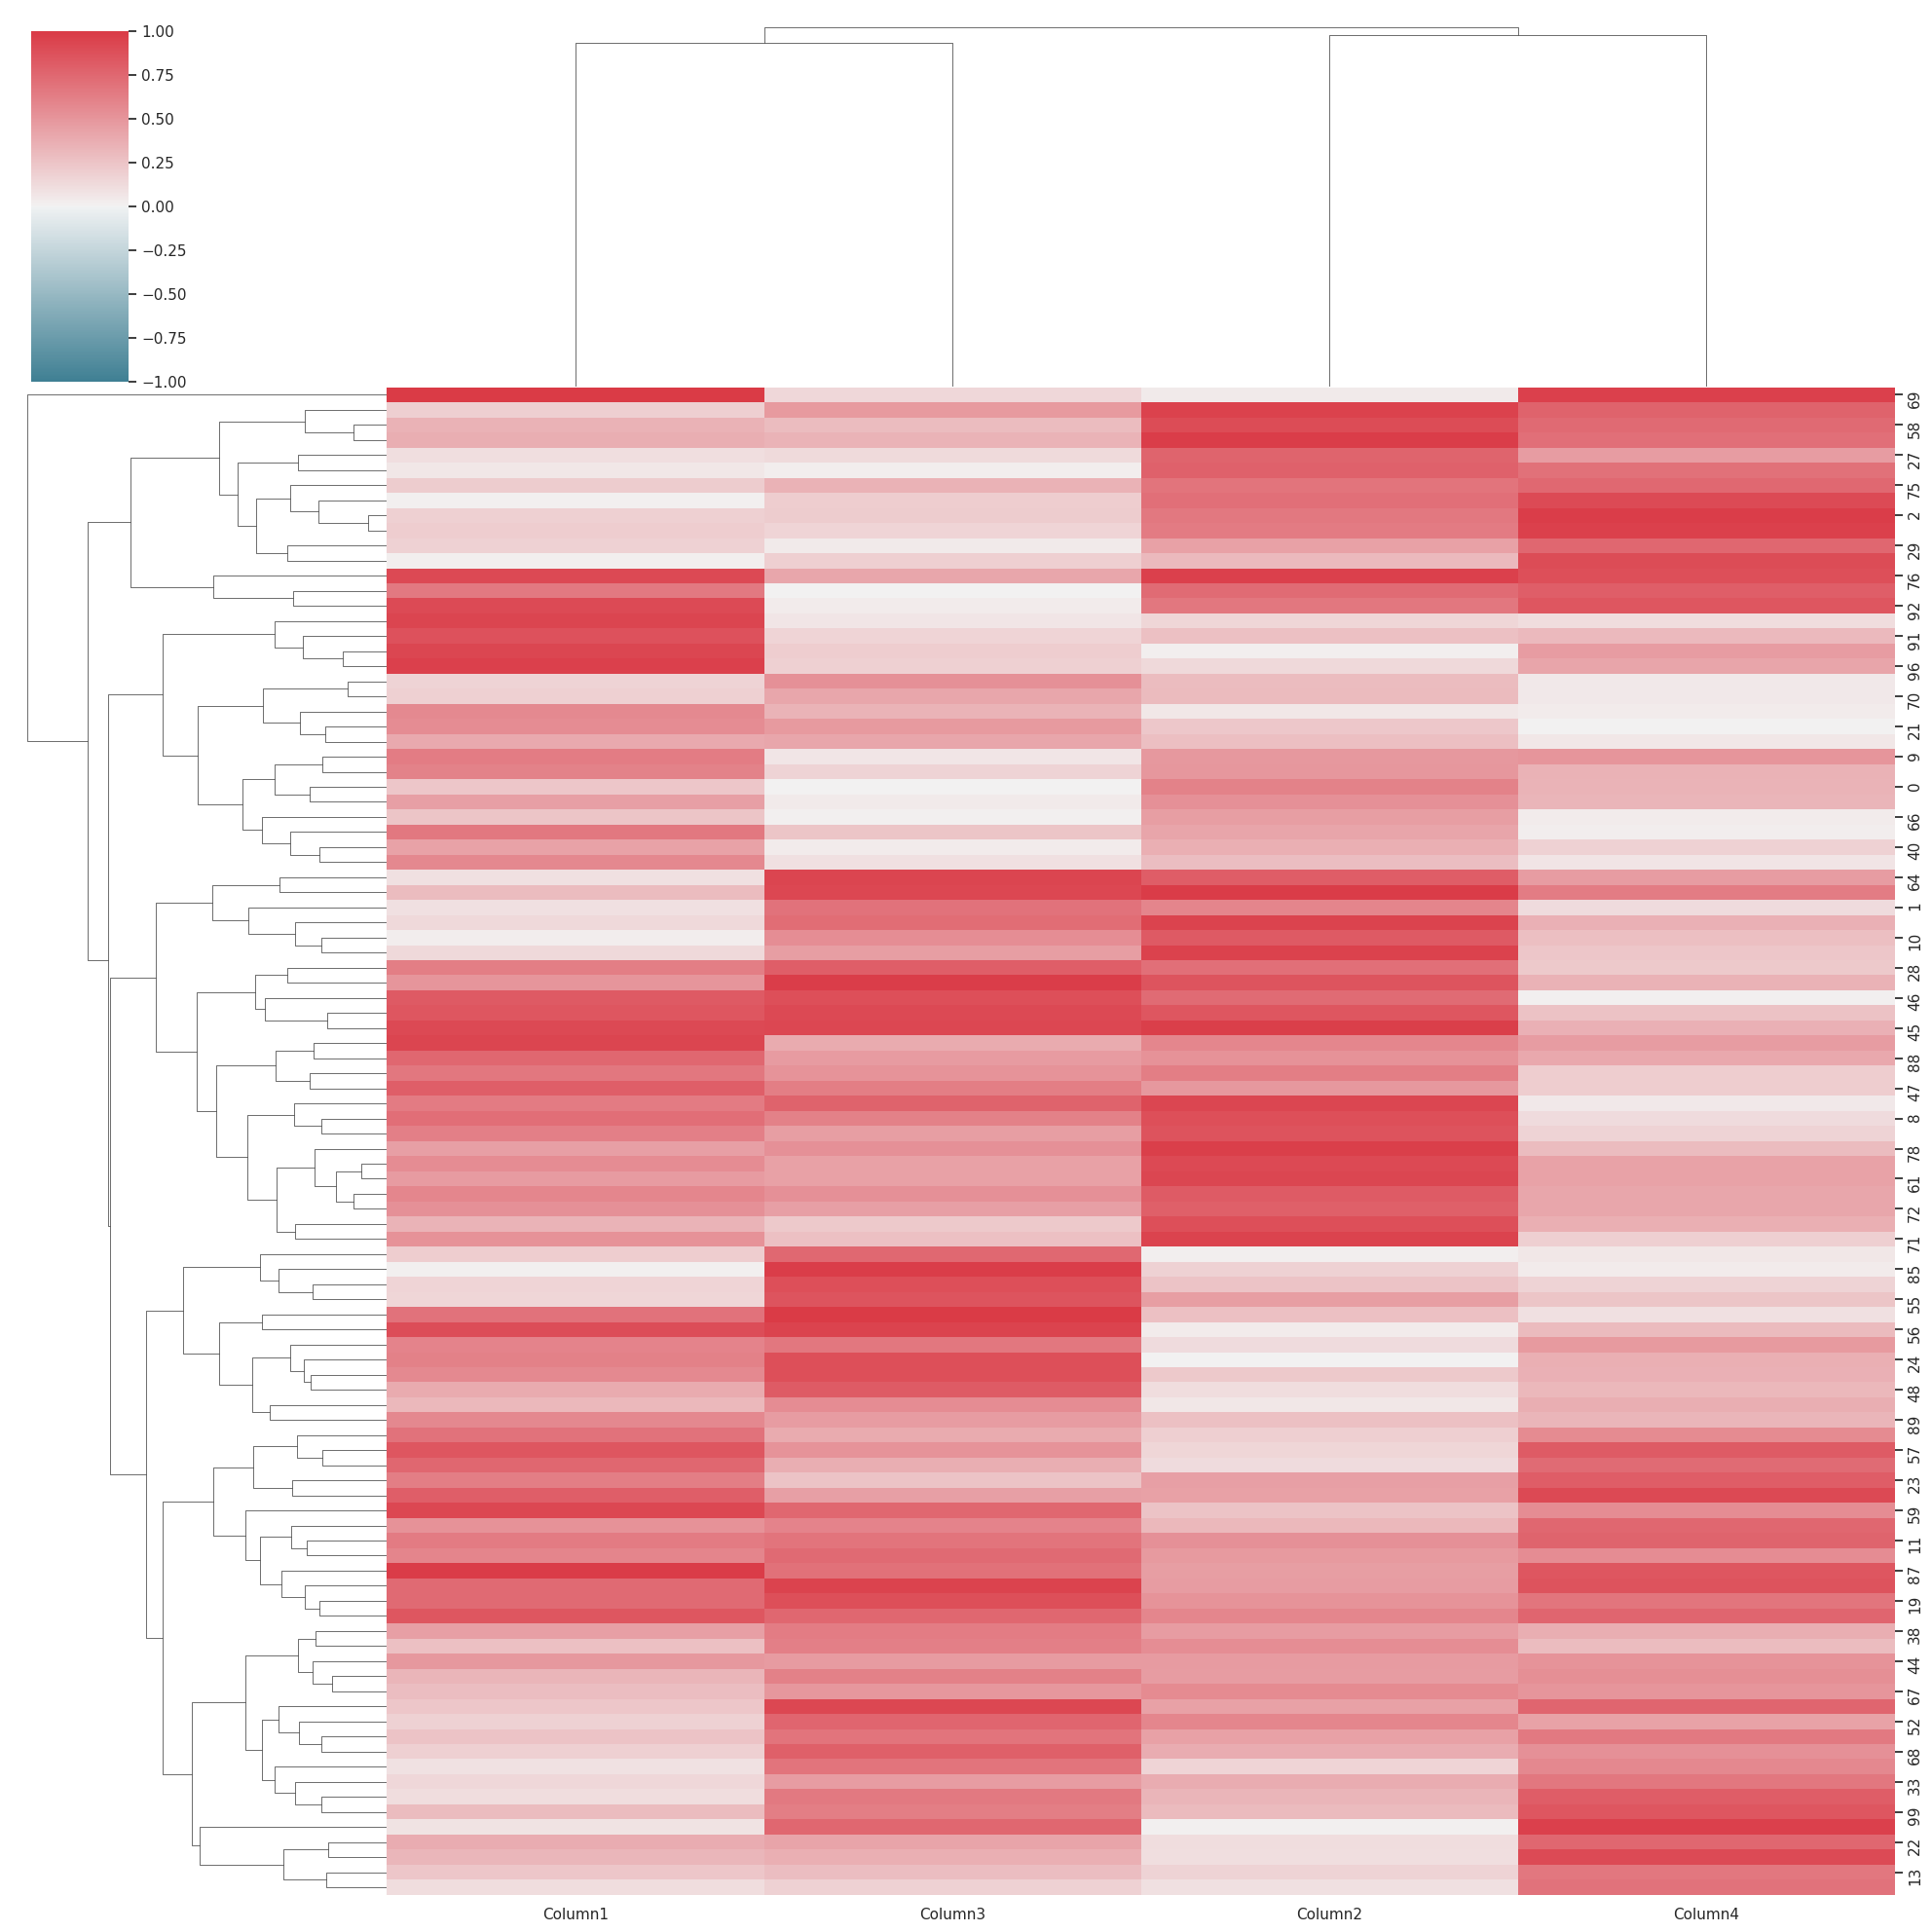

In [8]:
cplocorr.plot_heatmap(test_df, mode, figsize=config["figsize"])

## `plot_performance()`

In [15]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.614GB vms=3.094GB mem_pct=16%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.617GB vms=3.096GB mem_pct=16%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


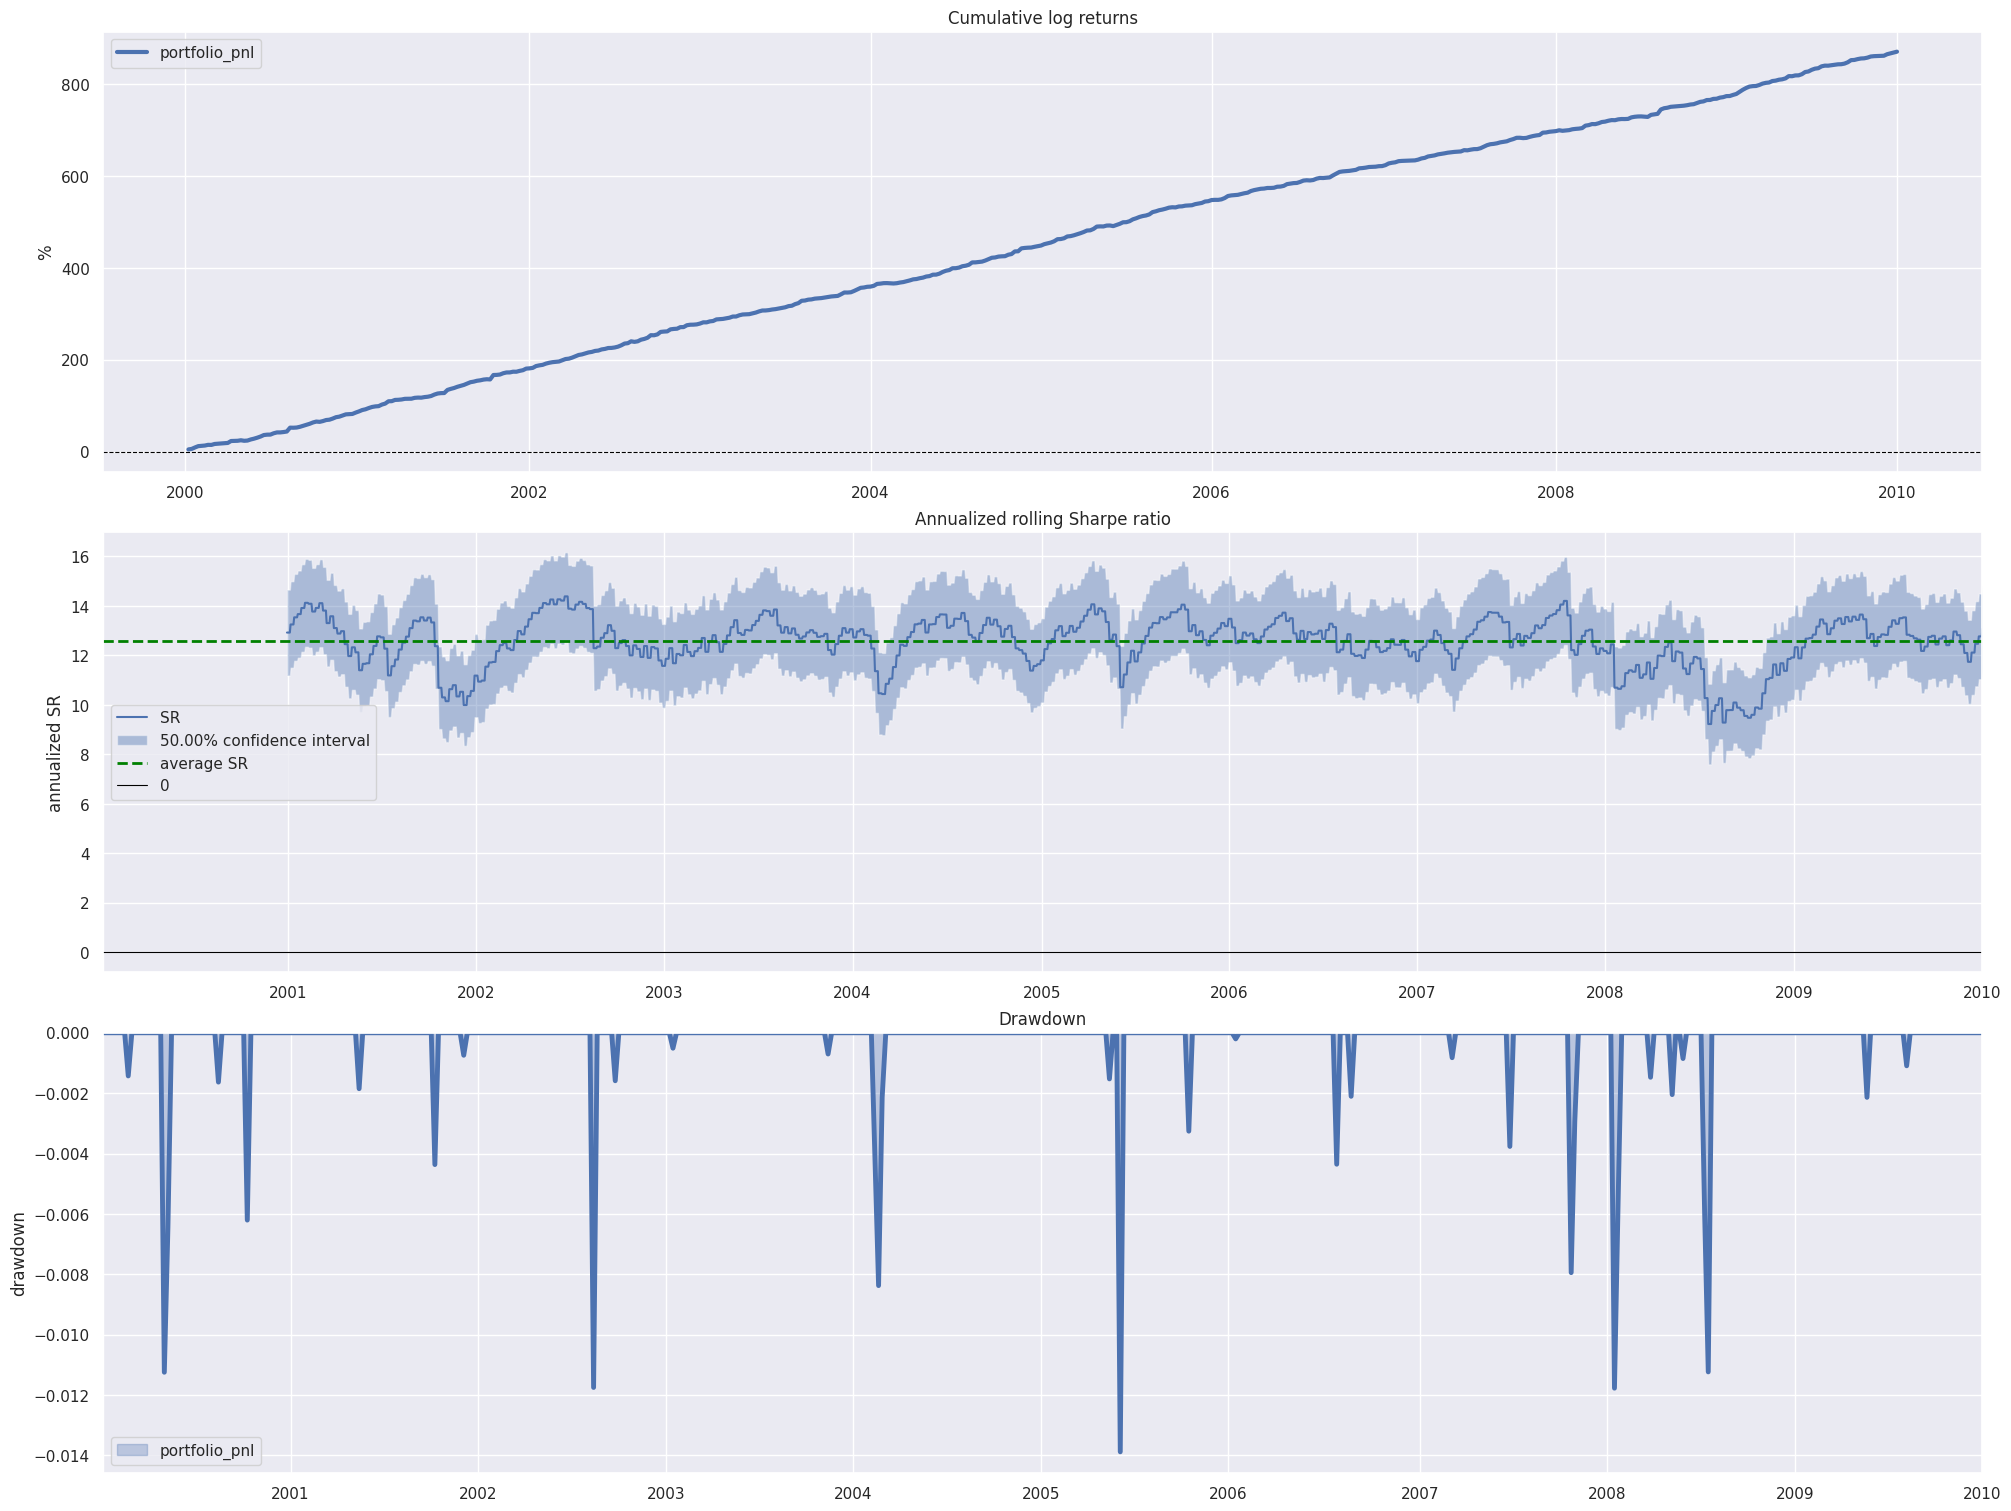

In [16]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_rets_signal_analysis()`

In [17]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.629GB vms=3.108GB mem_pct=16%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.629GB vms=3.108GB mem_pct=16%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


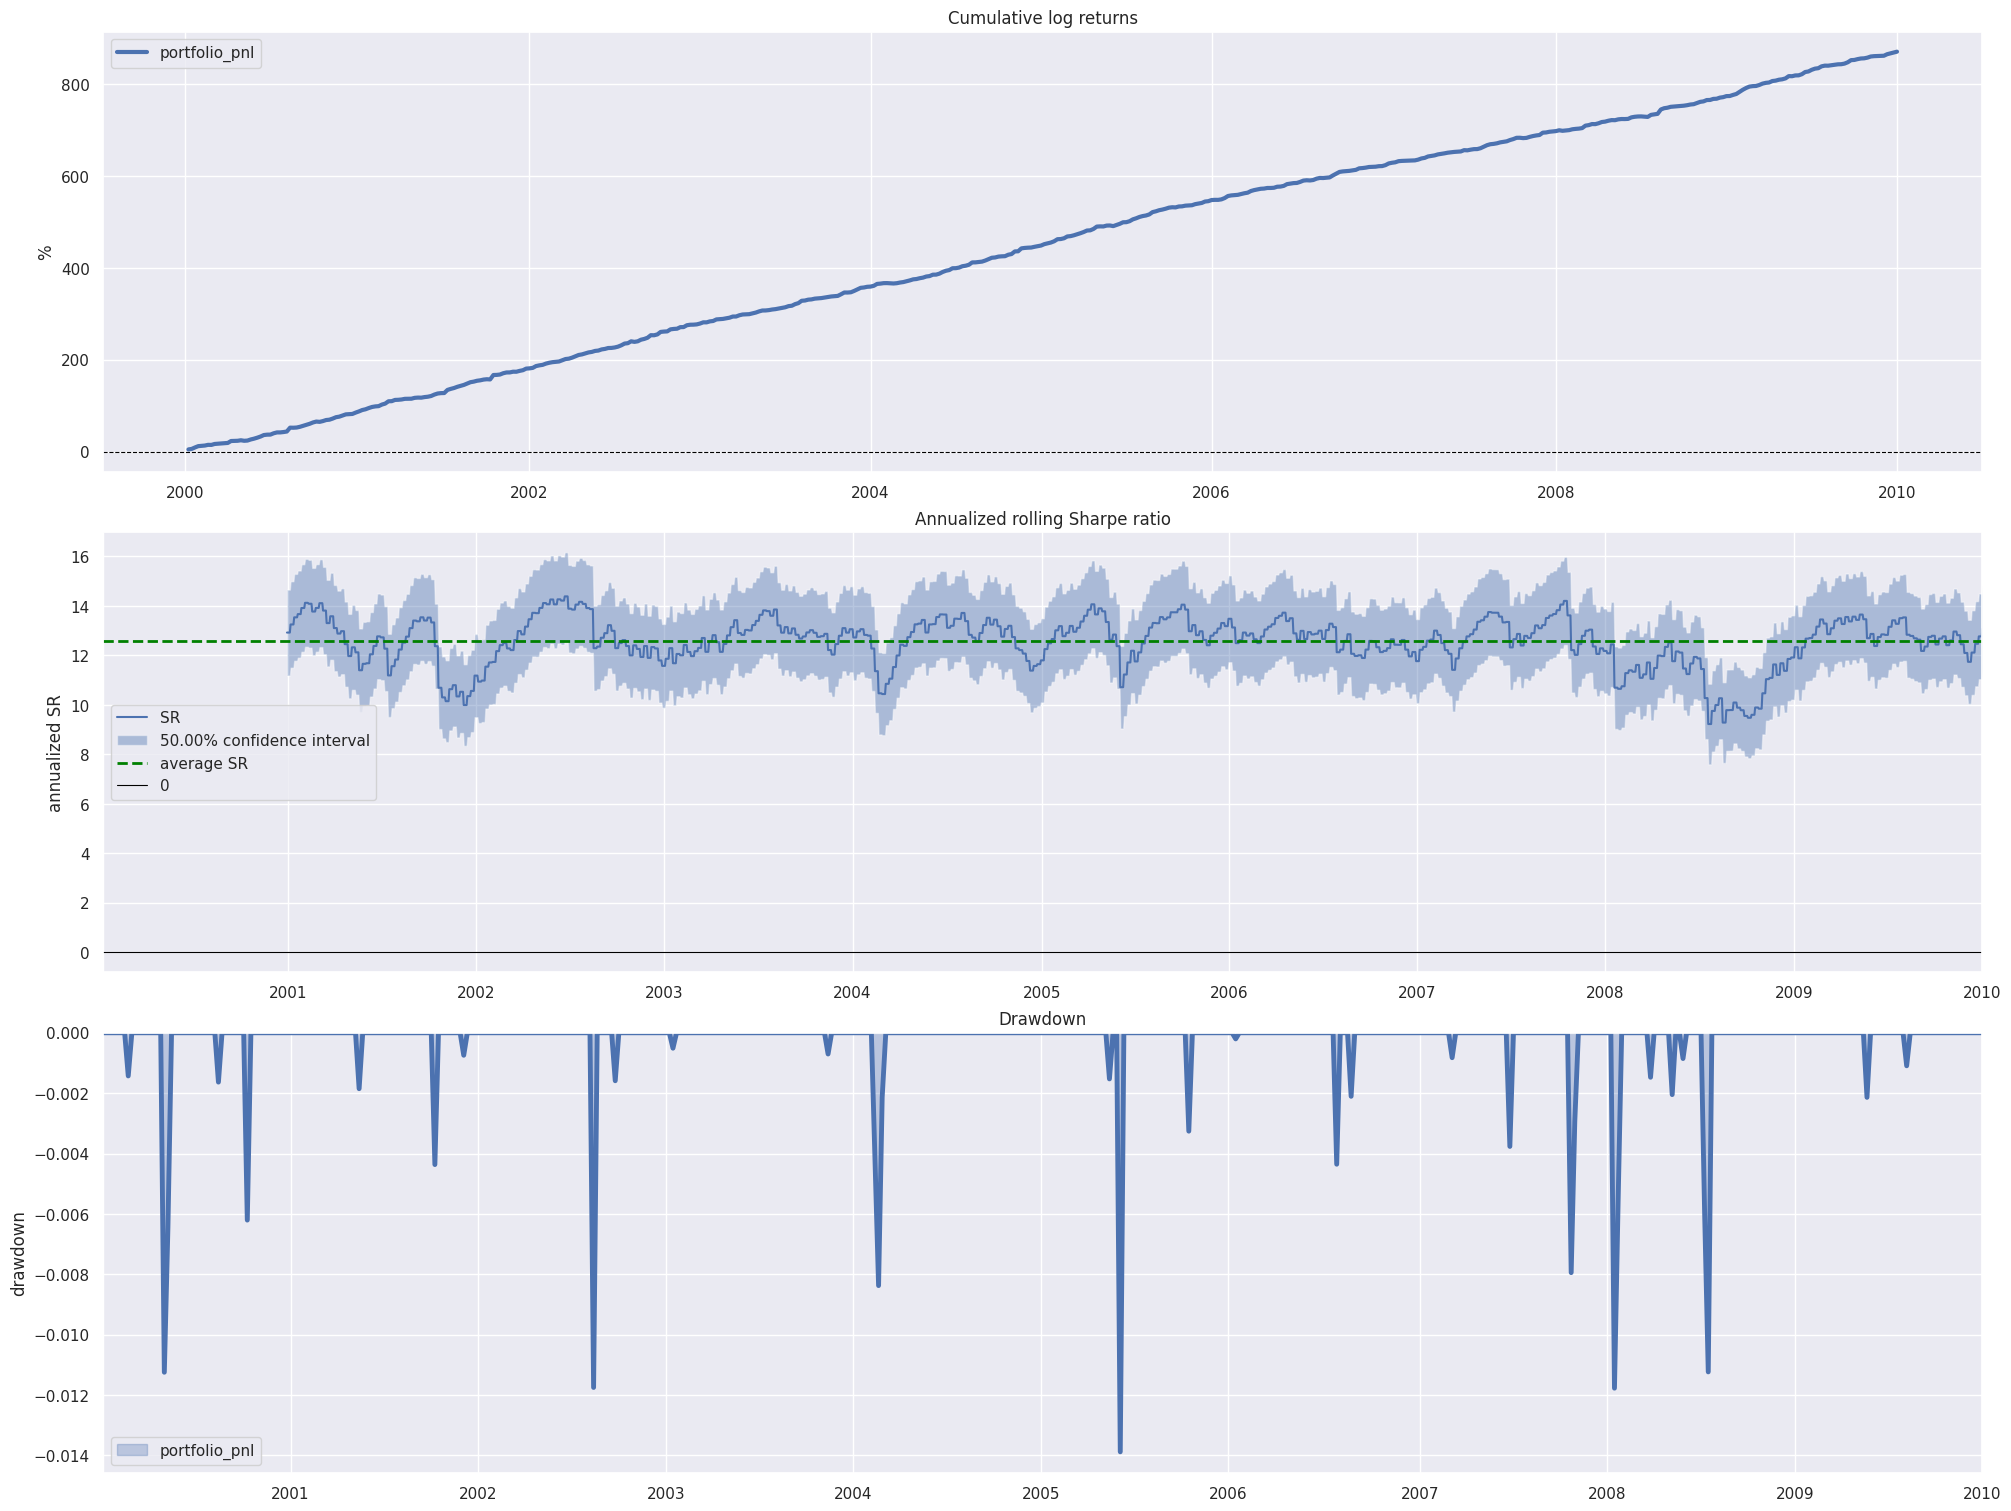

In [18]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_effective_correlation_rank()`

In [12]:
test_df = cptetepl.Test_plots.get_test_plot_df1()

[3.931993231783241, 3.864292108619247, 3.1034898261145107]

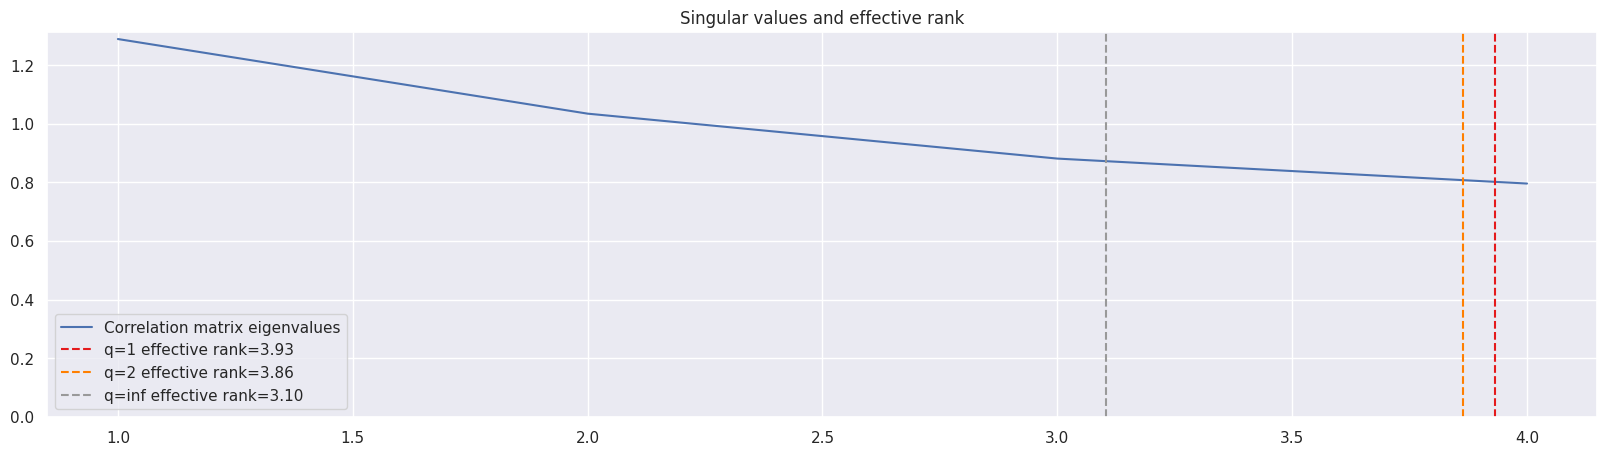

In [13]:
cplocorr.plot_effective_correlation_rank(test_df)

[2.428244488466705,
 2.7051679170113525,
 2.726857130577548,
 2.660661507946788,
 2.39193275638912]

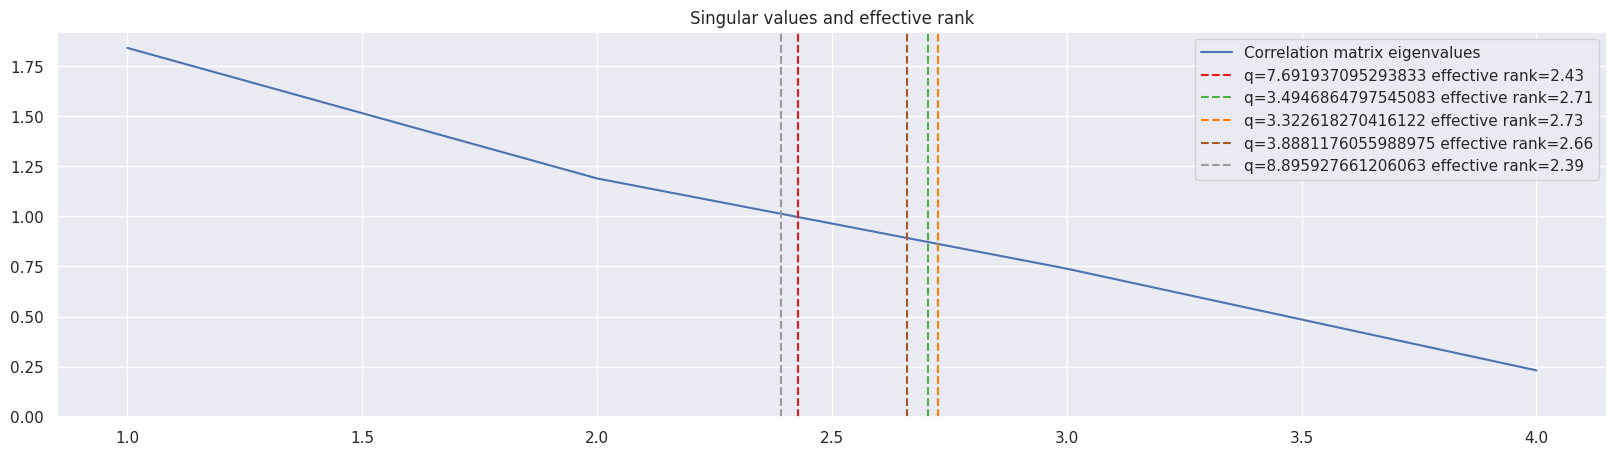

In [21]:
num_q_values = 5
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

In [15]:
test_df = cptetepl.Test_plots.get_test_plot_df1()

/venv/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '


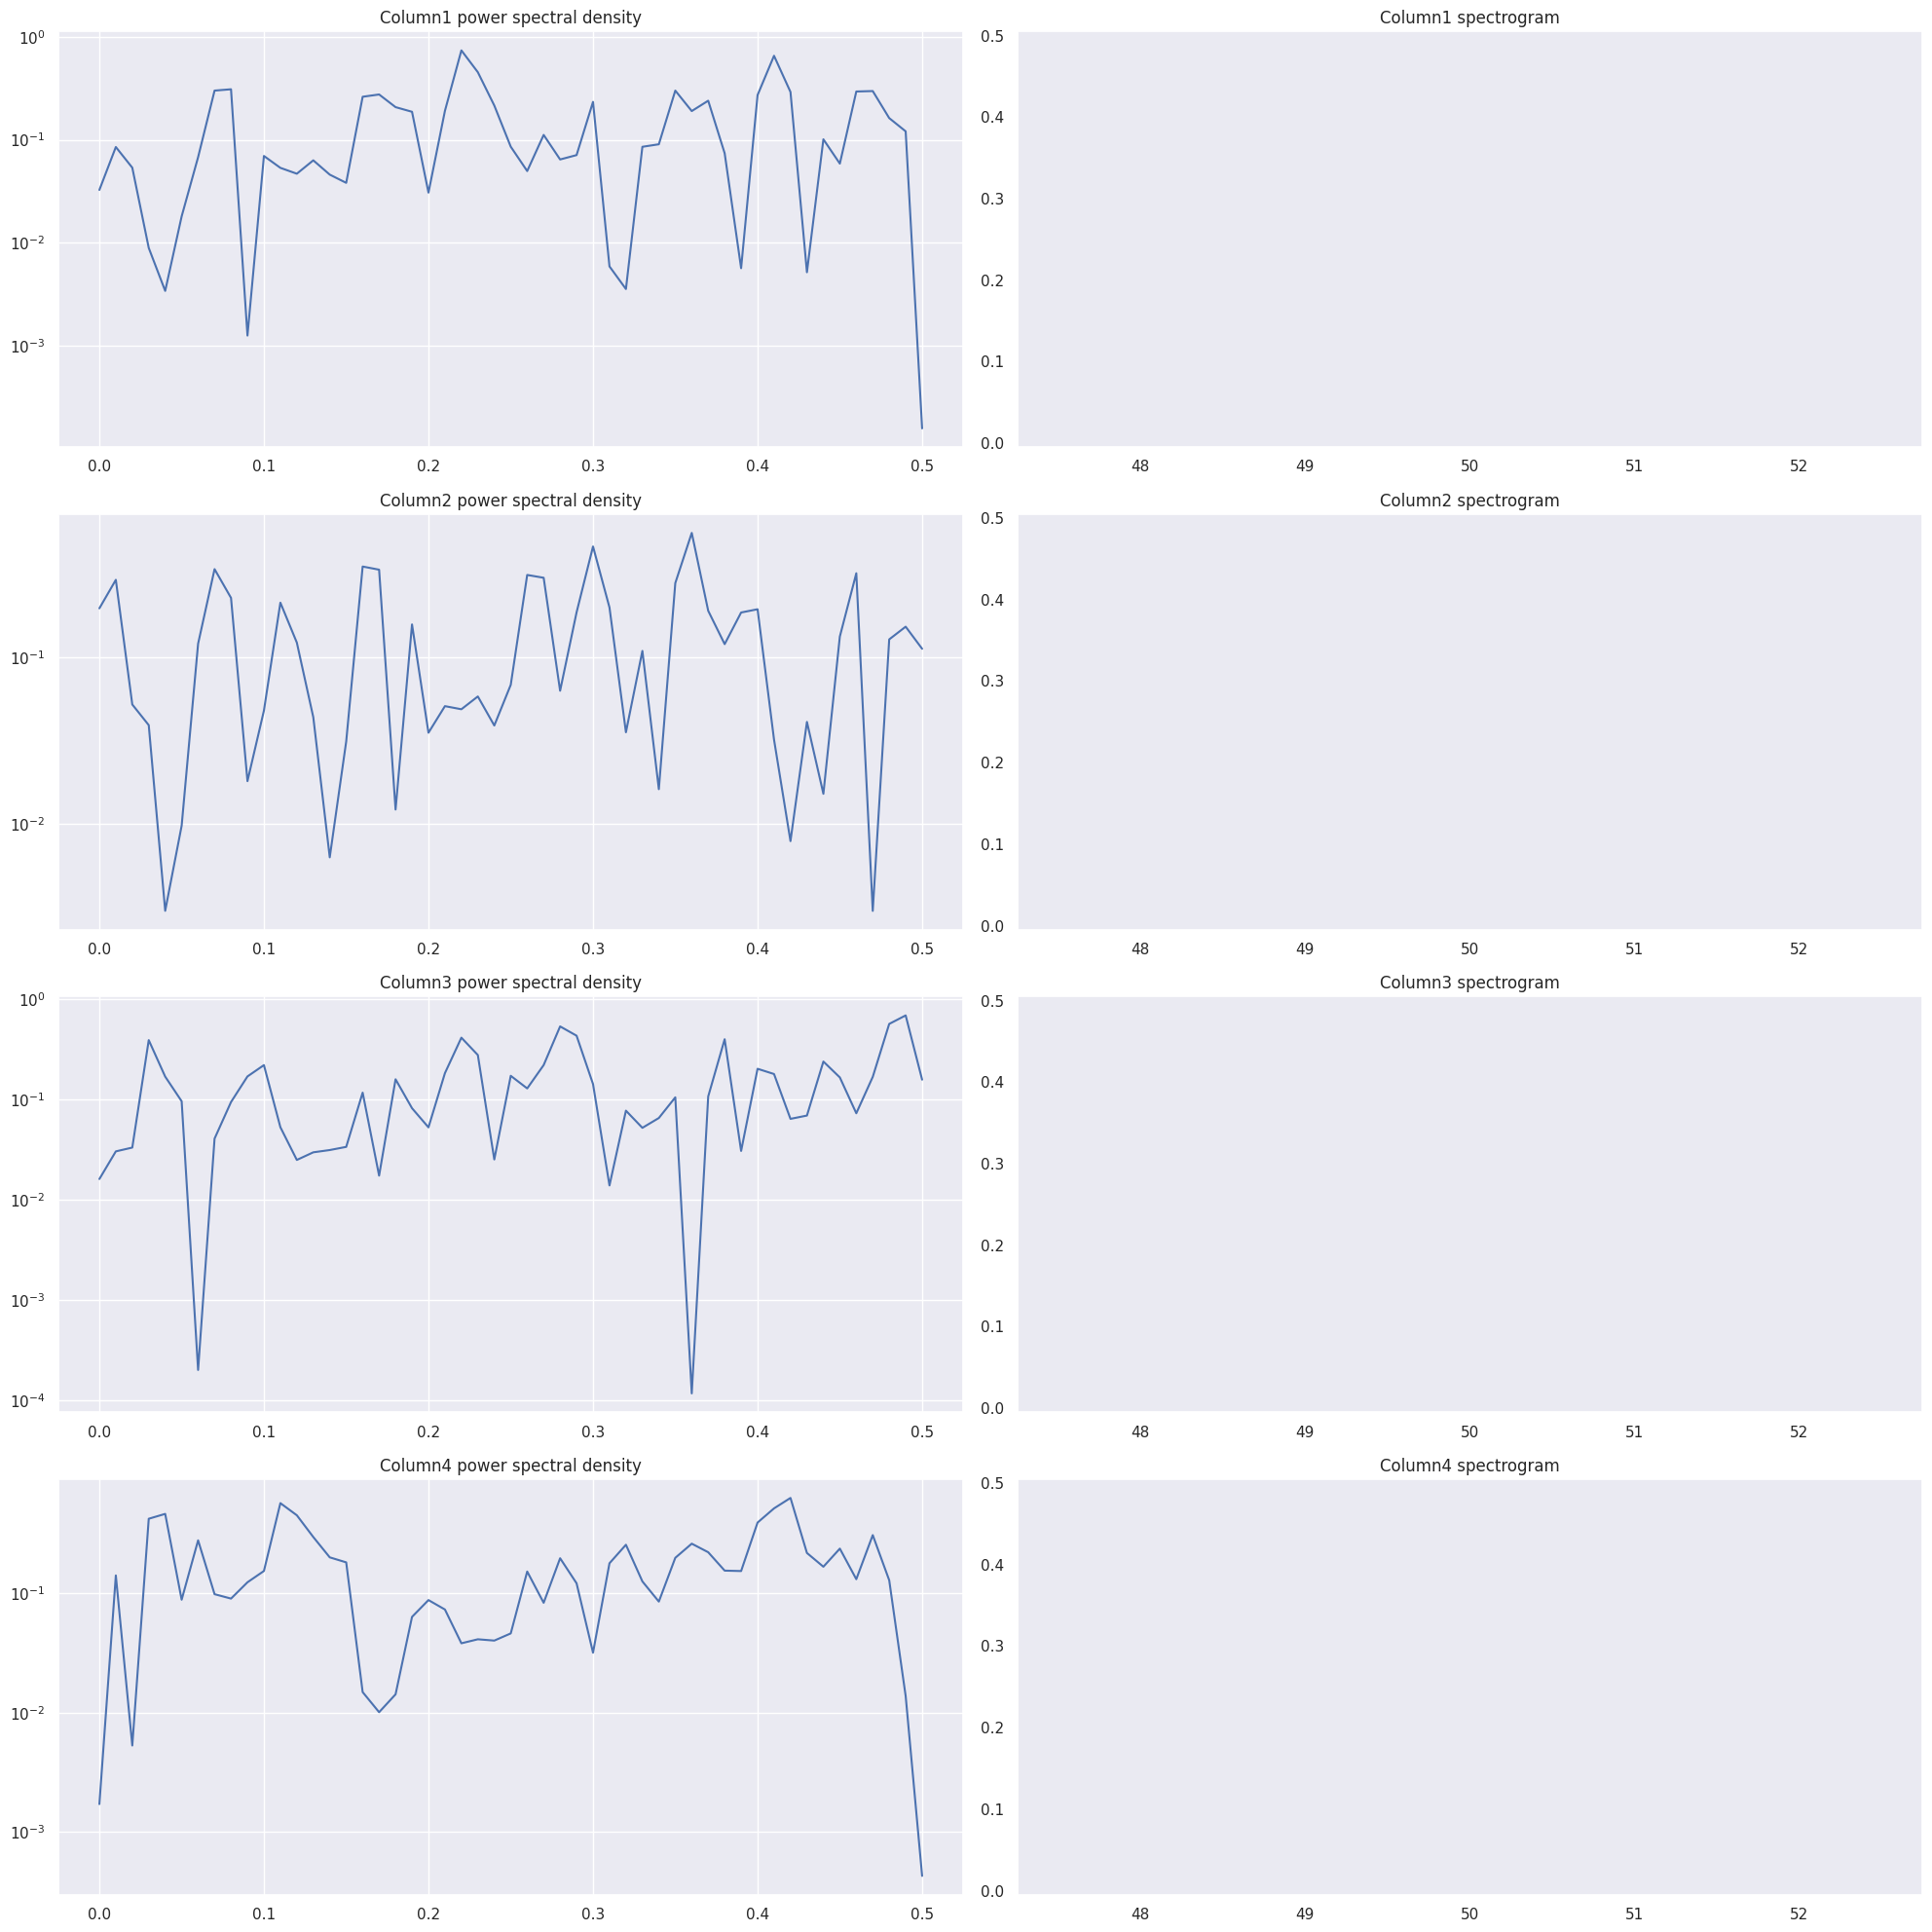

In [16]:
cplmiplo.plot_spectrum(test_df)

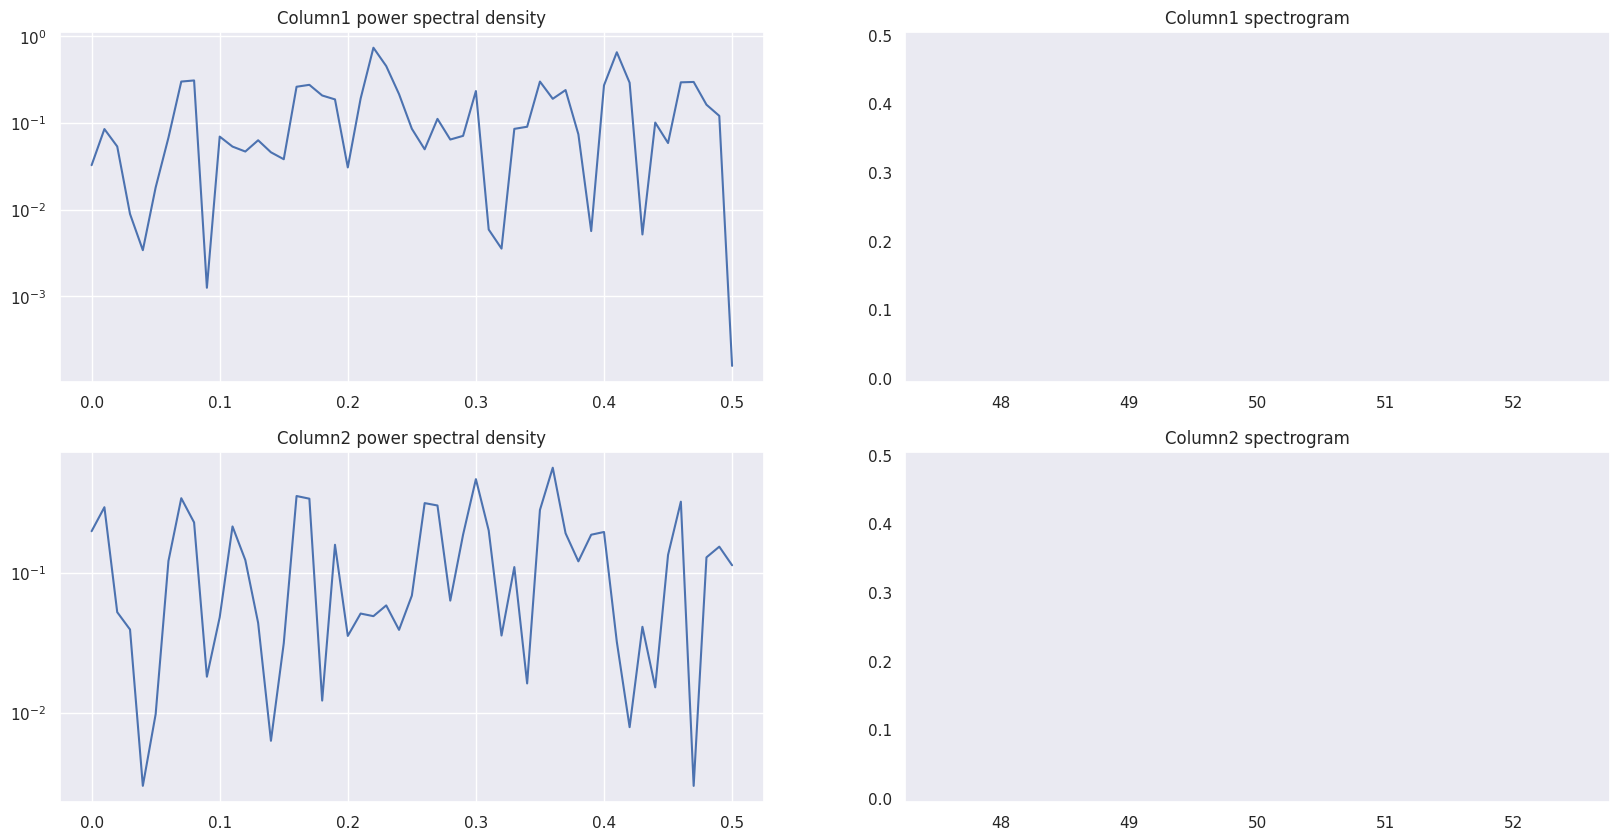

In [17]:
_, axes = plt.subplots(2, 2, figsize=config["figsize"])
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)